In [8]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import torch
import deep_sdf.workspace as ws
import json
import numpy as np
import matplotlib.pyplot as plt
import deep_sdf

In [3]:
experiment_directory = "../examples/torus"
specs = ws.load_experiment_specifications(experiment_directory)
data_source = specs["DataSource"]
test_split_file = specs["TrainSplit"]
test_split_file = os.path.join("../", test_split_file)

In [4]:
print("test_split_file: ", test_split_file)
print("data_source: ", data_source)

test_split_file:  ../examples/splits/splits_new/test_split_torus_small.json
data_source:  /home/jakaria/torus_bump_5000_two_scale_binary_bump_variable_noise_fixed_angle/sdf_data/SdfSamples/obj_files


In [6]:
labels = torch.load(data_source + "/labels.pt")
with open(test_split_file, "r") as f:
    test_split = json.load(f)

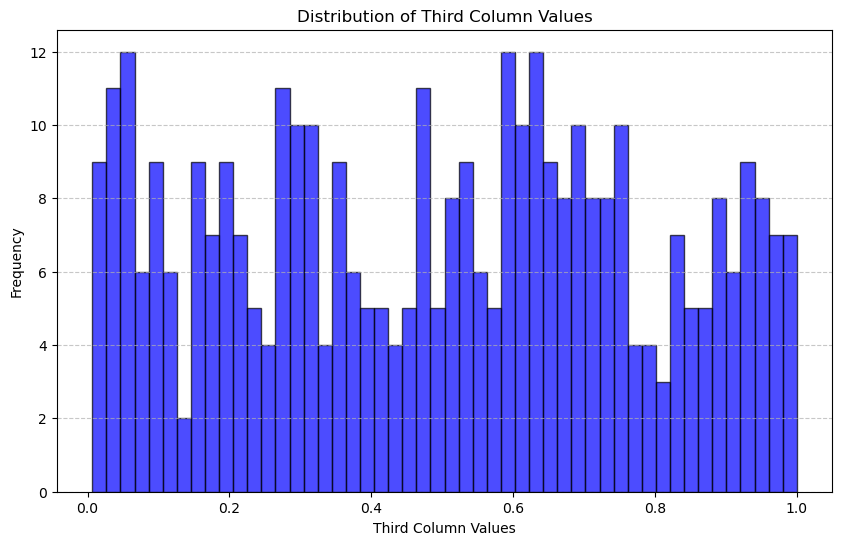

In [33]:
# Extract the base names (without .obj extension)
keys_to_extract = [name.replace('.obj', '') for name in test_split]
# Extract third column values for matching keys
third_column_values = []
for key in keys_to_extract:
    if key in labels:  # Check if the key exists in the large label file
        third_column_values.append(labels[key][2])  # Get the third column value

# Check if we got any values
if not third_column_values:
    print("No matching keys found!")
else:
    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(third_column_values, bins=50, color='blue', alpha=0.7, edgecolor='black')
    plt.title('Distribution of Third Column Values')
    plt.xlabel('Third Column Values')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [7]:
latent_vectors = ws.load_latent_vectors(experiment_directory, "latest")

In [15]:
latent_vectors.shape

torch.Size([369, 16])